In [18]:
from data.datamodule import MNISTDatamodule, CIFAR10Datamodule, CIFAR100Datamodule, MNIST
from transforms import UnNormalize

In [232]:
from torchvision import transforms as T
from data.transforms import Permute

mnist_transform = T.Compose(
    [
        Permute([2, 0, 1]),
        T.Normalize(mean=[0.1307], std=[0.3081]),
        T.RandomHorizontalFlip(0.5)
    ]
)

cifar_transform = T.Compose(
    [
        Permute([2, 0, 1]),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        T.RandomHorizontalFlip(0.5)
    ]
)

unnormalize = UnNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [228]:
mnist_dm = MNISTDatamodule(
    train_transform=mnist_transform,
    inference_transform=mnist_transform,
    data_dir="./../data"
)
mnist_dm.prepare_data()
mnist_dm.setup()

cifar_dm = CIFAR10Datamodule(
    train_transform=cifar_transform,
    inference_transform=cifar_transform,
    data_dir="./../data"
)
cifar_dm.prepare_data()
cifar_dm.setup()

In [229]:
mnist_dm.train.data[0].max(), cifar_dm.train.data[0].max()

(tensor(1.), tensor(0.9569))

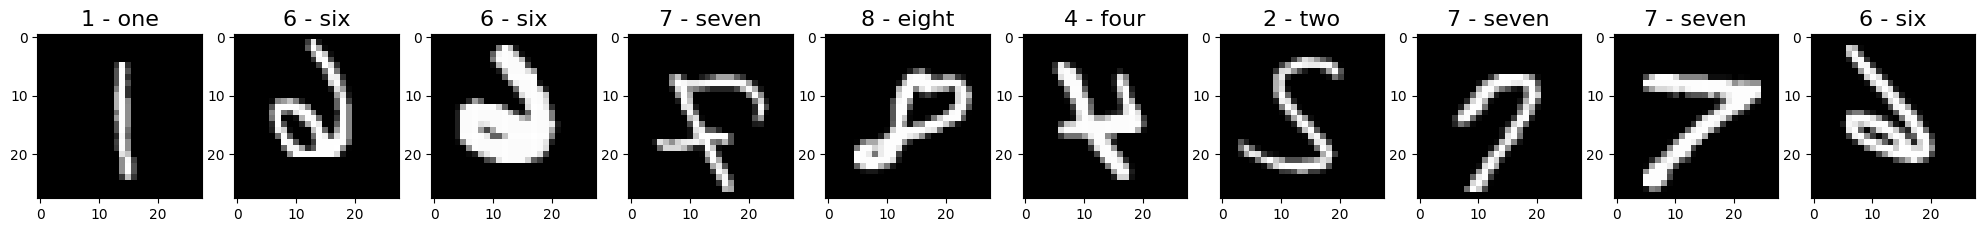

In [230]:
fig = mnist_dm.plot_images(split="train")

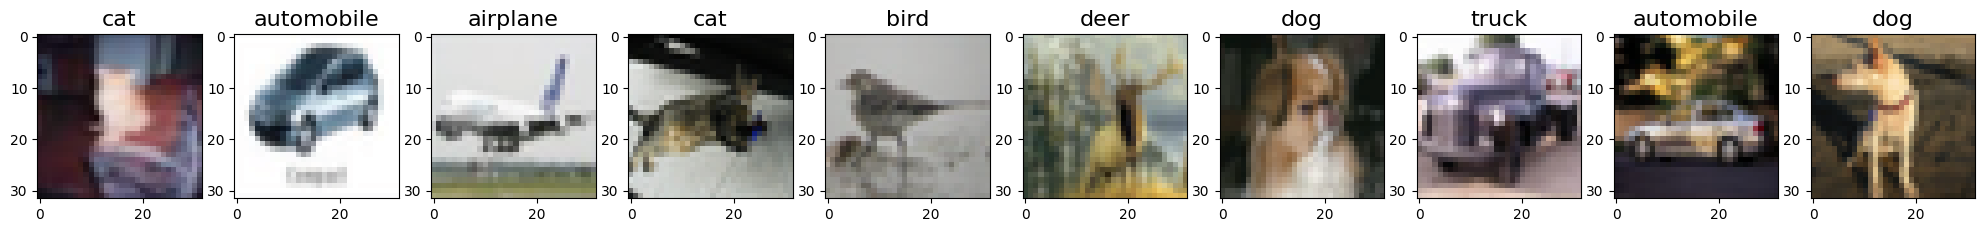

In [234]:
fig = cifar_dm.plot_images(split="train", transform=unnormalize)

In [2]:
torch.__version__

'2.0.0+cu117'

In [1]:
import torch
from torch.utils.data import random_split
from torchvision.datasets import MNIST

mnist = MNIST(root="../data")
train, test = random_split(mnist, [.7, .3])
print(f"full MNIST shape: {mnist.data.shape}")
print(f"train shape: {train.dataset.data.shape}")
print(f"test shape: {test.dataset.data.shape}")

full MNIST shape: torch.Size([60000, 28, 28])
train shape: torch.Size([60000, 28, 28])
test shape: torch.Size([60000, 28, 28])


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
